# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [13]:
# imports
import pandas as pd

In [14]:
ruta = "insurance.csv"
df = pd.read_csv(ruta)

In [15]:
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

### Pre-procesado

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
num_columns = ['age', 'bmi']
cat_columns = ['sex', 'children', 'smoker', 'region']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[num_columns])

scaled_df = pd.DataFrame(df_scaled, columns=num_columns)
df[num_columns] = scaled_df

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

df_encoded = encoder.fit_transform(df[cat_columns])

encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=encoder.get_feature_names_out(cat_columns))
df = pd.concat([df.drop(columns=cat_columns), encoded_df], axis=1)

In [20]:
df.head()

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,16884.92400,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,1725.55230,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,4449.46200,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,21984.47061,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,3866.85520,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


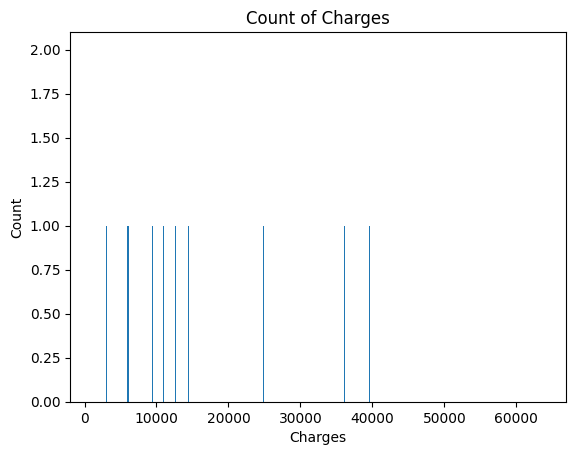

In [25]:
import matplotlib.pyplot as plt

charge_counts = df['charges'].value_counts()

plt.bar(charge_counts.index, charge_counts.values)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Count of Charges')
plt.show()

### Modelos

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype             
---  ------            --------------  -----             
 0   age               1338 non-null   float64           
 1   bmi               1338 non-null   float64           
 2   charges           1338 non-null   float64           
 3   sex_female        1338 non-null   Sparse[float64, 0]
 4   sex_male          1338 non-null   Sparse[float64, 0]
 5   children_0        1338 non-null   Sparse[float64, 0]
 6   children_1        1338 non-null   Sparse[float64, 0]
 7   children_2        1338 non-null   Sparse[float64, 0]
 8   children_3        1338 non-null   Sparse[float64, 0]
 9   children_4        1338 non-null   Sparse[float64, 0]
 10  children_5        1338 non-null   Sparse[float64, 0]
 11  smoker_no         1338 non-null   Sparse[float64, 0]
 12  smoker_yes        1338 non-null   Sparse[float64, 0]
 13  region_northeast  

#### Random Forest Regression

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [150],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('Best parameters:', best_params)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error (RMSE):', rmse)

C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Mean Squared Error: 21491836.404149912
Root Mean Squared Error (RMSE): 4635.928860988908


C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [40]:
feature_importances = rf_regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
10,smoker_no,0.432686
1,bmi,0.209921
11,smoker_yes,0.175932
0,age,0.132399
4,children_0,0.006654
12,region_northeast,0.006293
5,children_1,0.005141
8,children_4,0.004592
6,children_2,0.004277
3,sex_male,0.004252


### SVR

In [34]:
from sklearn.svm import SVR

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [10],
    'epsilon': [0.5],
    'kernel': ['linear']
}

grid_search = GridSearchCV(estimator=SVR(), 
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',  
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

svr_regressor = SVR(**best_params)

svr_regressor.fit(X_train, y_train)

y_pred = svr_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print('Best parameters:', best_params)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Best parameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Mean Squared Error: 127976844.17762093
Root Mean Squared Error (RMSE): 11312.685100258954


C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### GRADIENT BOOSTING REG

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05],
    'max_depth': [3],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

gb_regressor = GradientBoostingRegressor(**best_params, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print('Best parameters:', best_params)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error (RMSE):', rmse)

C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 18848791.007118437
Root Mean Squared Error (RMSE): 4341.519435303548


C:\Users\jdldo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [33]:
feature_importances = gb_regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
11,smoker_yes,0.387074
10,smoker_no,0.303440
1,bmi,0.181169
0,age,0.116853
4,children_0,0.004813
8,children_4,0.002092
6,children_2,0.001200
12,region_northeast,0.001155
15,region_southwest,0.000786
5,children_1,0.000489


### XGBOOST

In [41]:
import xgboost as xgb

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'objective': 'reg:squarederror',  # Specify the learning task and the objective function
    'eval_metric': 'rmse',  # Evaluation metric to be used
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum depth of the tree
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'subsample': 0.8,  # Subsample ratio of the training instance
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'seed': 42  # Random seed
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_boost_round = 1000  # Number of boosting rounds
early_stopping_rounds = 10  # Early stopping rounds to prevent overfitting
evals = [(dtrain, 'train'), (dtest, 'eval')]  # Evaluation set to monitor performance
model = xgb.train(params, dtrain, num_boost_round, evals=evals, early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print('Mean Squared Error:', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error: 19429732.360415787
Root Mean Squared Error (RMSE): 4407.917009247768


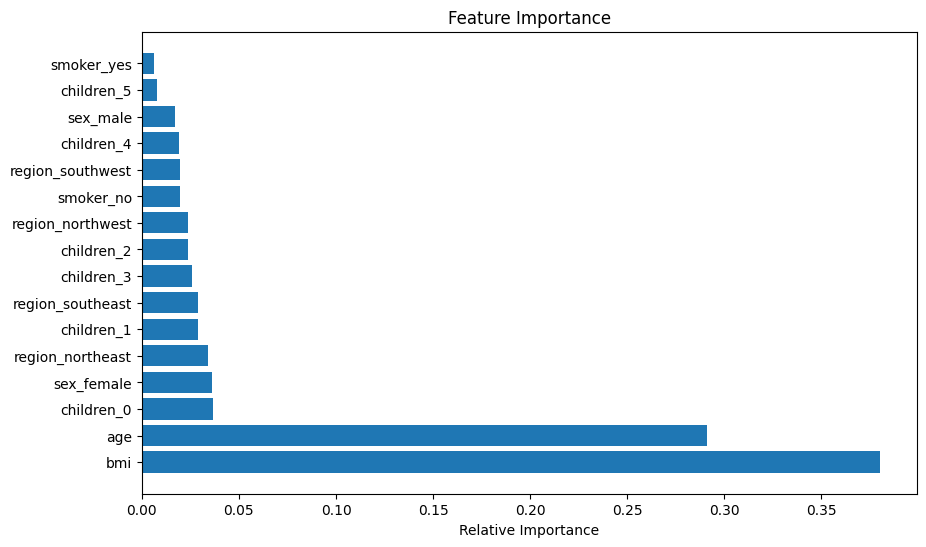

In [42]:
model = xgb.train(params, dtrain, num_boost_round, evals=evals, early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

feature_importance = model.get_score(importance_type='weight')

total = sum(feature_importance.values())
feature_importance = {k: v / total for k, v in feature_importance.items()}

sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
features, importance = zip(*sorted_feature_importance)
plt.barh(range(len(features)), importance, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

# Conclusiones

Gracias a los modelos de ML somos capaces de predecir con margen de error el resultado